<a href="https://colab.research.google.com/github/Mohd-Farhan/DataScience-Projects/blob/main/Neural_Network_that_Read_Handwritting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mohd. Farhan Siddiqui**

**Artificial Intelligence Intern at Evolve Intern**

**Task 2 Develop A Neural Network That Can Read Handwriting**

**Importing Libraries**

In [ ]:
import tensorflow  as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

**Loading Data**

In [ ]:
test=pd.read_csv('/content/drive/MyDrive/Dataset/mnist_test.csv')
train=pd.read_csv('/content/drive/MyDrive/Dataset/mnist_train.csv')

**Exploratory Data Analysis**

In [ ]:
test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [ ]:
test.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.0000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,4.443400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.179300,0.163600,0.052600,0.0006,0.0,0.0,0.0,0.0,0.0,0.0
std,2.895865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.674149,5.736072,2.420004,0.0600,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,156.000000,6.0000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


In [ ]:
train.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [ ]:
test.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

**Data Preprocessing**

In [ ]:
xtest=test.drop(columns='label')
ytest=test['label']
xtrain=train.drop(columns='label')
ytrain=train['label']

In [ ]:
xtest.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ytest

0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Name: label, Length: 10000, dtype: int64

In [ ]:
xtrain.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ytrain.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [ ]:
len(xtrain)

60000

In [ ]:
len(xtest)

10000

**Data Visualization**

In [ ]:
x=xtrain.values.reshape(-1,28,28)

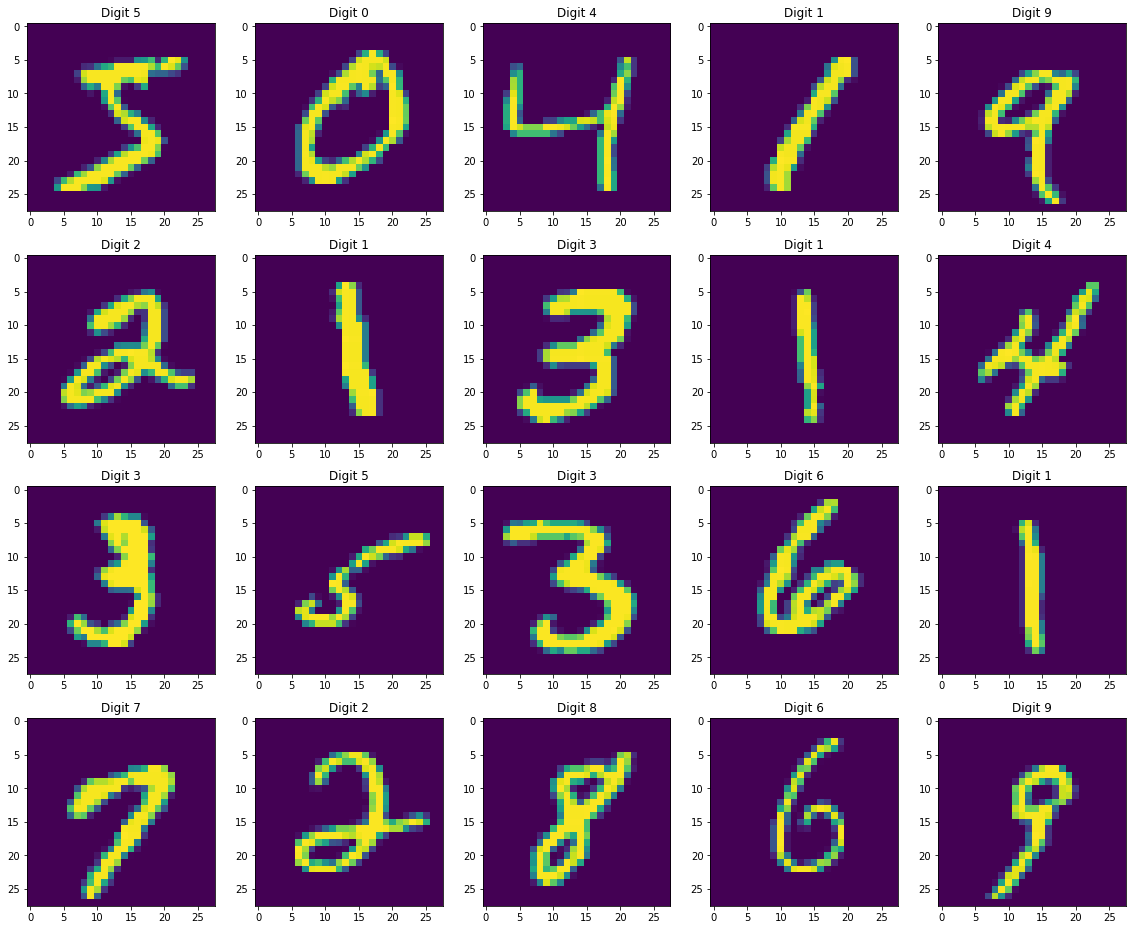

In [ ]:
fig=plt.figure(figsize=(16,16))
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.imshow(x[i])
  plt.title("Digit {}".format(ytrain[i]))
plt.tight_layout()

Text(0.5, 1.0, 'Frequency of each Digit')

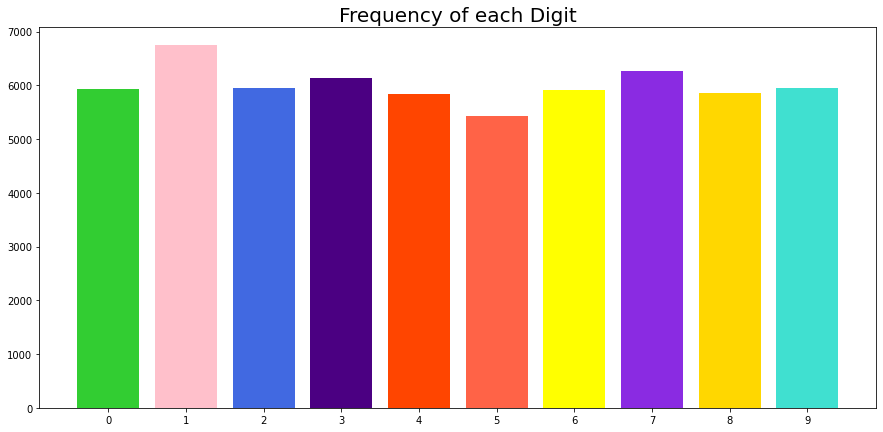

In [ ]:
total=ytrain.value_counts().index
freq=ytrain.value_counts().values
plt.figure(figsize=(15,7))
plt.bar(total,freq,color=["pink","blueviolet","indigo","royalblue","turquoise","limegreen","yellow","gold","orangered","tomato"])
plt.xticks(range(10))
plt.title("Frequency of each Digit", fontsize=20)

**Scaling Data**

In [ ]:
xtrain=xtrain/255
xtest=xtest/255

**Developing Neural Network**

In [ ]:
model=keras.Sequential([
        keras.layers.Dense(200,input_shape=(784,),activation='relu'),
        keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(xtrain,ytrain,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2364 - accuracy: 0.9313
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0997 - accuracy: 0.9699
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0672 - accuracy: 0.9791
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0475 - accuracy: 0.9850
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0365 - accuracy: 0.9894
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0268 - accuracy: 0.9920
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0221 - accuracy: 0.9931
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0173 - accuracy: 0.9947
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0133 - accuracy: 0.9959
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.012

**Prediction**

In [ ]:
model.predict(xtest)

array([[3.9002299e-04, 2.5386462e-06, 1.1719465e-03, ..., 9.9999964e-01,
        1.1005104e-03, 7.8737009e-01],
       [7.2359486e-05, 9.9448991e-01, 1.0000000e+00, ..., 2.3724941e-10,
        3.9006889e-02, 4.9784803e-09],
       [1.6530570e-06, 9.9946314e-01, 2.1019608e-02, ..., 1.8818721e-01,
        5.4602742e-02, 1.3199167e-06],
       ...,
       [4.1439088e-13, 2.2891468e-06, 2.6241176e-11, ..., 5.6281644e-01,
        4.0863454e-03, 9.9825692e-01],
       [4.4003129e-04, 2.4704048e-07, 1.2837997e-08, ..., 6.1100527e-06,
        9.9839300e-01, 3.1698835e-10],
       [8.0079734e-03, 6.9565669e-07, 3.7749410e-03, ..., 3.4566185e-09,
        3.1033981e-06, 2.9251335e-10]], dtype=float32)

In [ ]:
ypredict=model.predict(xtest)
ypredict=[np.argmax(i) for i in ypredict]

**Confusion Metrix**

In [ ]:
matrix=tf.math.confusion_matrix(labels=ytest,predictions=ypredict)
matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    2,    0,    1,    0,    3,    1,    4,    0],
       [   0, 1127,    0,    1,    0,    1,    2,    0,    4,    0],
       [   1,    3, 1009,    3,    0,    0,    1,   10,    4,    1],
       [   0,    0,    4,  991,    0,    5,    0,    3,    4,    3],
       [   0,    0,    2,    1,  963,    0,    4,    1,    1,   10],
       [   1,    1,    0,    8,    2,  873,    2,    1,    3,    1],
       [   3,    1,    2,    1,    2,    3,  945,    0,    1,    0],
       [   0,    1,    6,    1,    0,    0,    0, 1014,    1,    5],
       [   3,    0,    3,    5,    4,    2,    0,    5,  948,    4],
       [   1,    2,    0,    4,   11,    5,    0,    6,    1,  979]],
      dtype=int32)>

Text(87.0, 0.5, 'Actual')

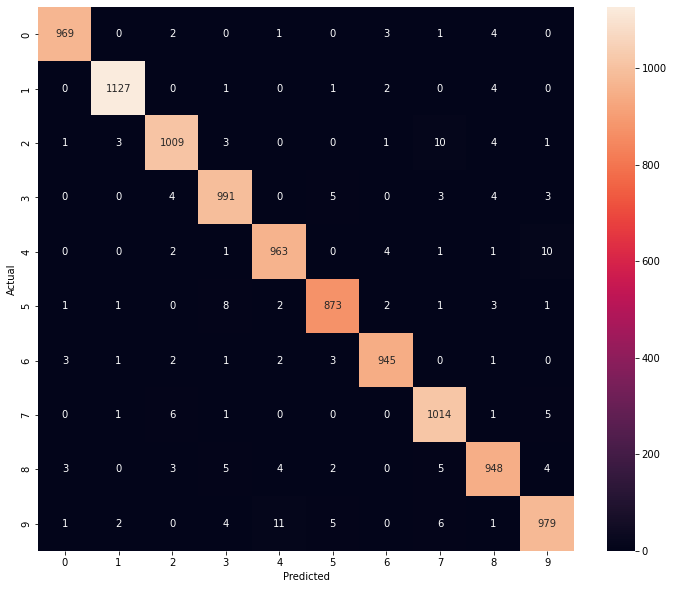

In [ ]:
plt.figure(figsize=(12,10))
sn.heatmap(matrix,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

**Model Accuracy**

In [ ]:
model.evaluate(xtest,ytest)


313/313 [==============================] - 1s 2ms/step - loss: 0.0701 - accuracy: 0.9820


[0.07008093595504761, 0.9819999933242798]

Model is 98.20% accurate